In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv('/content/kaggle sale.csv')
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased satisfied 
0  15624510    Male   19            19000          0         no
1  15810944    Male   35            20000          0         no
2  15668575  Female   26            43000          0         no
3  15603246  Female   27            57000          0         no
4  15804002    Male   19            76000          0         no


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
satisfied          0
dtype: int64

In [ ]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


# Check the shape
print("Shape:", df.shape)

Number of duplicate rows: 0
Shape: (400, 6)


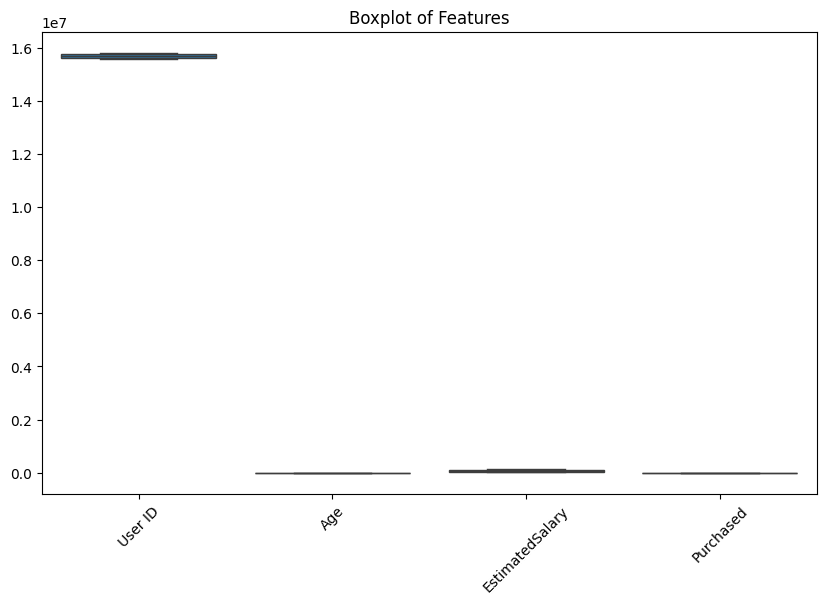

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(df)


      User ID  Gender  Age  EstimatedSalary  Purchased satisfied 
0    15624510       1   19            19000          0         no
1    15810944       1   35            20000          0         no
2    15668575       0   26            43000          0         no
3    15603246       0   27            57000          0         no
4    15804002       1   19            76000          0         no
..        ...     ...  ...              ...        ...        ...
395  15691863       0   46            41000          1        yes
396  15706071       1   51            23000          1        yes
397  15654296       0   50            20000          1        yes
398  15755018       1   36            33000          0        yes
399  15594041       0   49            36000          1        yes

[400 rows x 6 columns]
      User ID  Gender  Age  EstimatedSalary  Purchased  satisfied 
0    15624510       1   19            19000          0           0
1    15810944       1   35            20000       

In [ ]:
# Declare feature vector (X) & target vector (Y)
X = df.drop('satisfied ', axis=1)
Y = df['satisfied ']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


<Axes: >

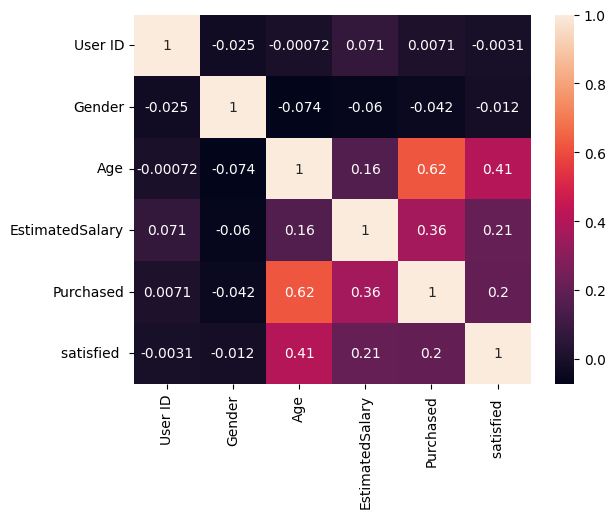

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1]


In [ ]:
# Predict Output for a sample
sample_index = 0  # Choose any index from the test set
sample_features = X_test_scaled[sample_index].reshape(1, -1)  # Reshape the sample for prediction

predicted = classifier.predict(sample_features)

print("Sample Index:", sample_index)
print("Actual Value:", Y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])


Sample Index: 0
Actual Value: 1
Predicted Value: 1


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[12 14]
 [ 5 49]]


In [ ]:
accuray = accuracy_score(y_pred, Y_test)
print(accuray)

0.7625


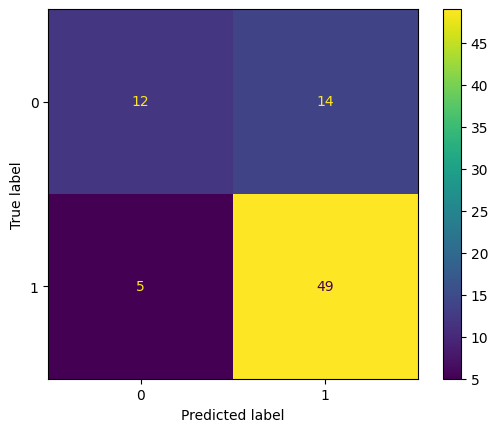

In [ ]:
labels = [0,1]
cm = confusion_matrix(Y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();


In [ ]:
# Classification Report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.46      0.56        26
           1       0.78      0.91      0.84        54

    accuracy                           0.76        80
   macro avg       0.74      0.68      0.70        80
weighted avg       0.75      0.76      0.75        80



<ipython-input-18-830452bd2a40>:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_red[:, 0], X_test_red[:, 1], c=Y_test_red, edgecolor='k', marker='x')


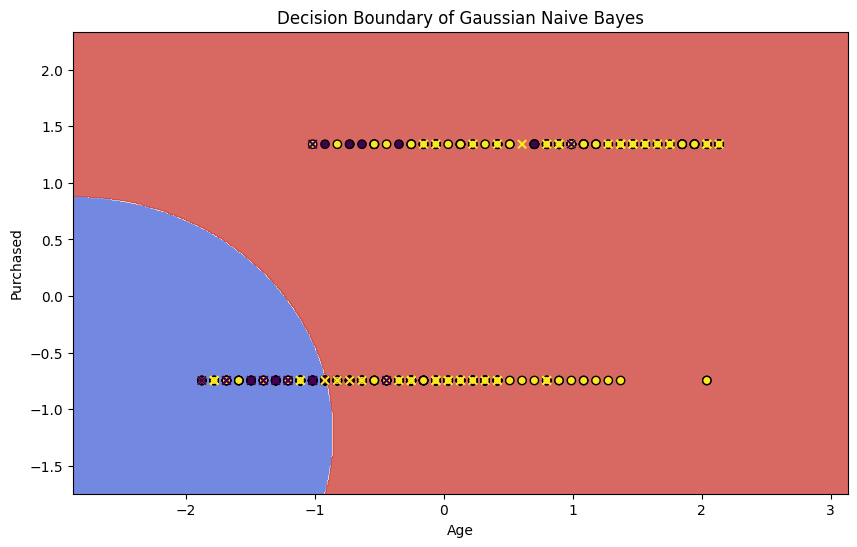

In [ ]:
# Selecting two features for simplicity
X_reduced = df[['Age', 'Purchased']]  # Replace with actual feature names
X_reduced_scaled = scaler.fit_transform(X_reduced)
X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(X_reduced_scaled, Y, test_size=0.2, random_state=42)

# Training the model on reduced features
classifier.fit(X_train_red, Y_train_red)

# Create a mesh to plot the decision boundary
x_min, x_max = X_train_red[:, 0].min() - 1, X_train_red[:, 0].max() + 1
y_min, y_max = X_train_red[:, 1].min() - 1, X_train_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_red[:, 0], X_train_red[:, 1], c=Y_train_red, edgecolor='k', marker='o')
plt.scatter(X_test_red[:, 0], X_test_red[:, 1], c=Y_test_red, edgecolor='k', marker='x')
plt.title("Decision Boundary of Gaussian Naive Bayes")
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.show()